# Import các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1.Phân tích dữ liệu khách hàng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_id        0
age                0
gender             0
annual_income      0
spending_score     0
purchase_amount    0
dtype: int64
       customer_id         age  annual_income  spending_score  purchase_amount
count  1000.000000  1000.00000    1000.000000     1000.000000      1000.000000
mean    500.500000    43.81900   51203.985000       50.139000       150.438000
std     288.819436    14.99103   14898.526105       28.296897        50.400996
min       1.000000    18.00000    6179.000000        1.000000       -16.000000
25%     250.750000    31.00000   40975.750000       25.750000       115.000000
50%     500.500000    44.00000   51135.500000       51.000000       151.000000
75%     750.250000    56.00000   61131.000000       75.000000       186.000000
max    1000.000000    69.00000   97896.000000       99.000000       284.000000


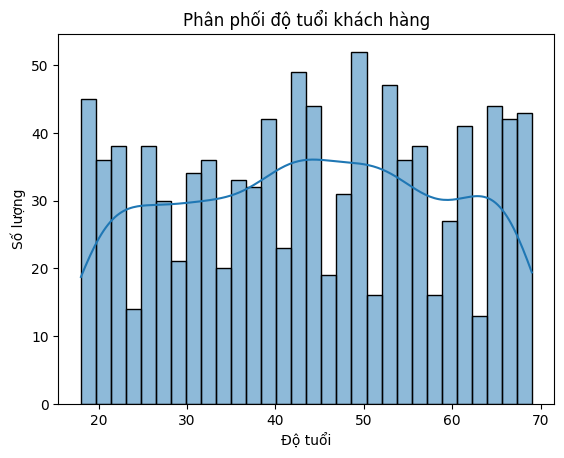

age_group
40-50    218
18-30    214
60+      183
30-40    181
50-60    180
<18       24
Name: count, dtype: int64
Mean Squared Error: 2457.5022893280634
R2 Score: -0.004464565686965738


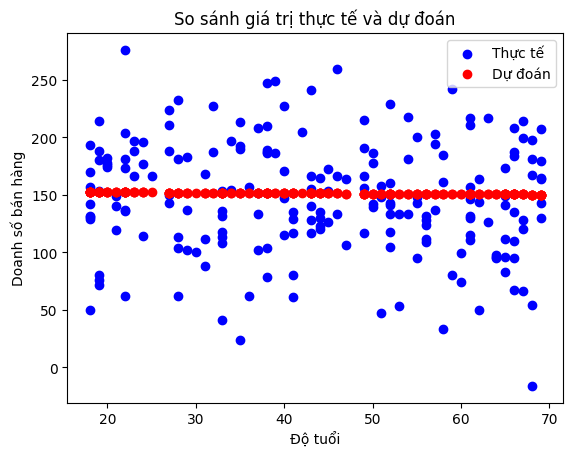

In [ ]:
# Bước 1: Thu thập dữ liệu
# Giả sử dữ liệu khách hàng được lưu trong một file CSV
df = pd.read_csv('customer_data.csv')

# Bước 2: Tiền xử lý dữ liệu
# Kiểm tra dữ liệu thiếu
print(df.isnull().sum())

# Loại bỏ các dòng có dữ liệu thiếu
df = df.dropna()

# Bước 3: Phân tích khám phá
# Tổng quan về dữ liệu
print(df.describe())

# Vẽ biểu đồ phân phối độ tuổi
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Phân phối độ tuổi khách hàng')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.show()

# Bước 4: Phân tích phân khúc
# Giả sử chúng ta phân khúc khách hàng theo độ tuổi
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, np.inf], labels=['<18', '18-30', '30-40', '40-50', '50-60', '60+'])

# Đếm số lượng khách hàng trong mỗi nhóm tuổi
age_group_counts = df['age_group'].value_counts()
print(age_group_counts)

# Bước 5: Dự đoán và mô hình hóa
# Ví dụ đơn giản với mô hình hồi quy tuyến tính để dự đoán doanh số bán hàng dựa trên độ tuổi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Chọn các đặc trưng và biến mục tiêu
X = df[['age']]
y = df['purchase_amount']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Bước 6: Trực quan hóa dữ liệu
# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.scatter(X_test, y_test, color='blue', label='Thực tế')
plt.scatter(X_test, y_pred, color='red', label='Dự đoán')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.xlabel('Độ tuổi')
plt.ylabel('Doanh số bán hàng')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


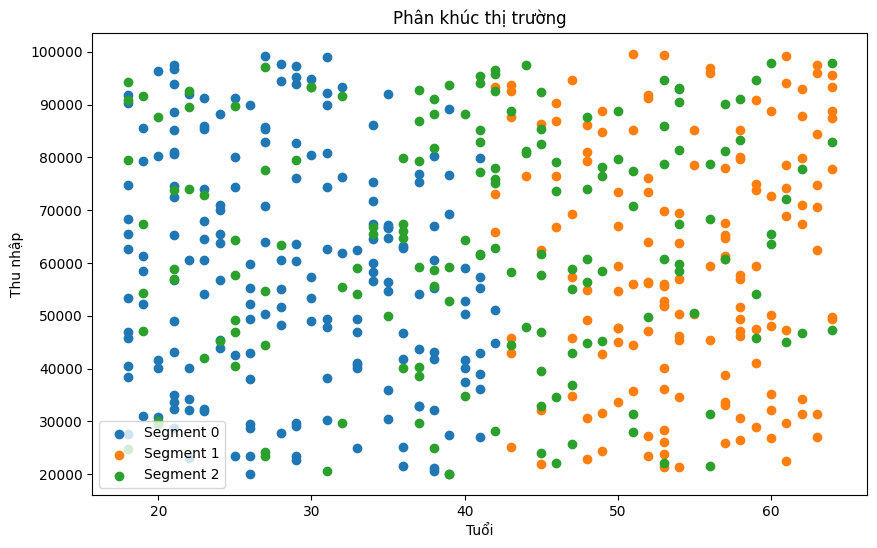

Thông tin phân khúc 0:
Số lượng khách hàng: 188
Độ tuổi trung bình: 28.81
Thu nhập trung bình: 58356.92
Tần suất mua hàng trung bình: 3.16
------------------------------
Thông tin phân khúc 1:
Số lượng khách hàng: 151
Độ tuổi trung bình: 54.36
Thu nhập trung bình: 59900.41
Tần suất mua hàng trung bình: 3.40
------------------------------
Thông tin phân khúc 2:
Số lượng khách hàng: 161
Độ tuổi trung bình: 41.14
Thu nhập trung bình: 64661.67
Tần suất mua hàng trung bình: 7.83
------------------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tạo dữ liệu giả lập cho mục đích minh họa
np.random.seed(0)
n_samples = 500
data = {
    "Age": np.random.randint(18, 65, size=n_samples),
    "Income": np.random.randint(20000, 100000, size=n_samples),
    "PurchaseFrequency": np.random.randint(1, 10, size=n_samples)
}
df = pd.DataFrame(data)

# Chuẩn hóa dữ liệu
df_scaled = (df - df.mean()) / df.std()

# Sử dụng thuật toán KMeans để phân khúc thị trường thành 3 nhóm
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=40)
df["Segment"] = kmeans.fit_predict(df_scaled)

# Hiển thị biểu đồ phân khúc thị trường
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(df[df["Segment"] == i]["Age"], df[df["Segment"] == i]["Income"], label=f"Segment {i}")
plt.xlabel("Tuổi")
plt.ylabel("Thu nhập")
plt.title("Phân khúc thị trường")
plt.legend()
plt.show()

# Hiển thị thông tin của từng phân khúc
for i in range(n_clusters):
    segment_data = df[df["Segment"] == i]
    print(f"Thông tin phân khúc {i}:")
    print(f"Số lượng khách hàng: {len(segment_data)}")
    print(f"Độ tuổi trung bình: {segment_data['Age'].mean():.2f}")
    print(f"Thu nhập trung bình: {segment_data['Income'].mean():.2f}")
    print(f"Tần suất mua hàng trung bình: {segment_data['PurchaseFrequency'].mean():.2f}")
    print("-" * 30)


###1.Dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn đến tệp CSV
file_path = '/data/customer_purchase_history.csv'
df = pd.read_csv(file_path)

# Loại bỏ khoảng trắng trong tên cột nếu có
df.columns = df.columns.str.strip()

# Hiển thị một số dòng dữ liệu đầu tiên
print(df.head())

# Kiểm tra thông tin dữ liệu
print(df.info())

# Kiểm tra các giá trị thiếu
print(df.isnull().sum())

# Xử lý các giá trị thiếu (nếu có)
df = df.dropna()


   order_id  customer_id  order_date  purchase_amount  quantity
0         1           23  2020-06-29           327.74         9
1         2           74  2023-01-26           265.88        10
2         3           81  2022-10-12           233.18         6
3         4           76  2022-07-31            22.53         5
4         5           92  2021-04-14           162.19         4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         1000 non-null   int64  
 1   customer_id      1000 non-null   int64  
 2   order_date       1000 non-null   object 
 3   purchase_amount  1000 non-null   float64
 4   quantity         1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB
None
order_id           0
customer_id        0
order_date         0
purchase_amount    0
quantity           0
dtype: int64


### 2. Hành vi khách hàng

In [ ]:
# Tổng số khách hàng
total_customers = df['customer_id'].nunique()
print("Tổng số khách hàng:", total_customers)

# Tổng số đơn hàng
total_orders = df['order_id'].nunique()
print("Tổng số đơn hàng:", total_orders)

# Tổng doanh thu
total_revenue = df['purchase_amount'].sum()
print("Tổng doanh thu:", total_revenue)

# Số lượng sản phẩm mua trung bình mỗi đơn hàng
average_items_per_order = df['quantity'].mean()
print("Số lượng sản phẩm mua trung bình mỗi đơn hàng:", average_items_per_order)

Tổng số khách hàng: 100
Tổng số đơn hàng: 1000
Tổng doanh thu: 255369.43
Số lượng sản phẩm mua trung bình mỗi đơn hàng: 5.594


### 3.Phân tích tần suất mua hàng

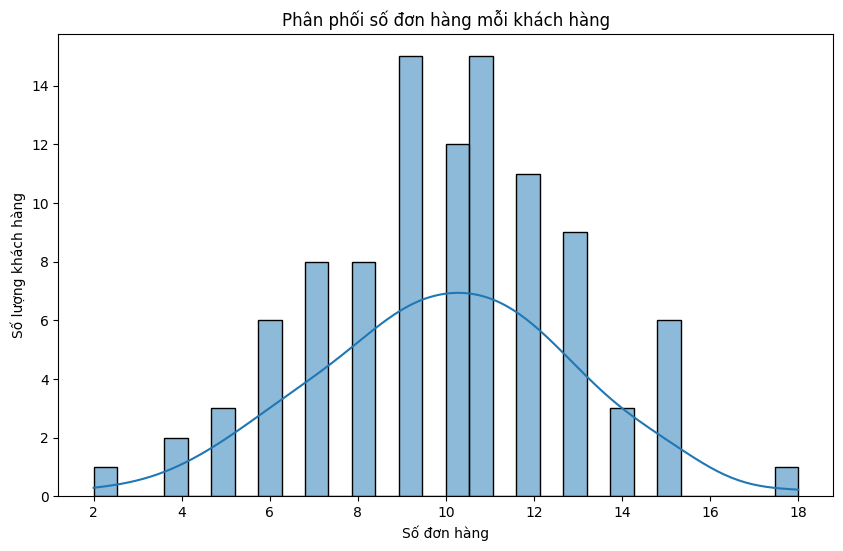

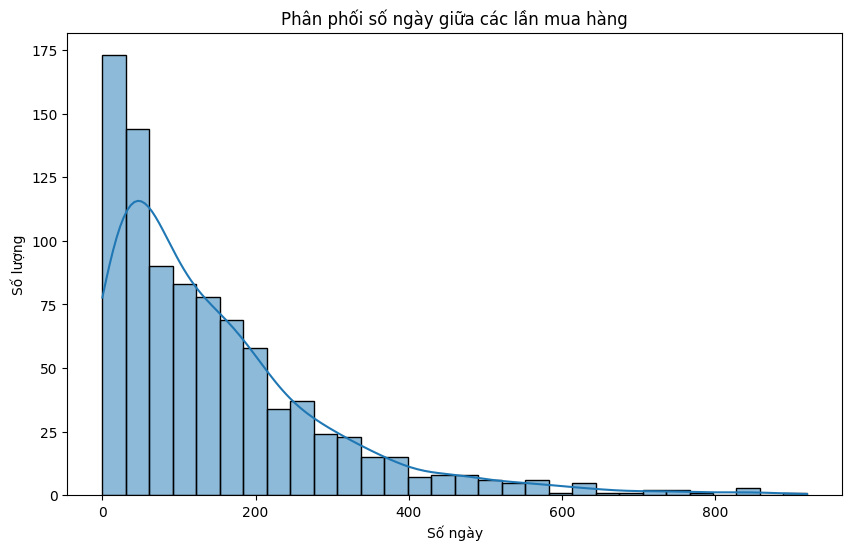

In [ ]:
  # Tính số đơn hàng mỗi khách hàng
  customer_order_counts = df.groupby('customer_id')['order_id'].nunique()

  # Vẽ biểu đồ phân phối số đơn hàng mỗi khách hàng
  plt.figure(figsize=(10, 6))
  sns.histplot(customer_order_counts, bins=30, kde=True)
  plt.title('Phân phối số đơn hàng mỗi khách hàng')
  plt.xlabel('Số đơn hàng')
  plt.ylabel('Số lượng khách hàng')
  plt.show()

  # Tính toán số ngày giữa các lần mua hàng của từng khách hàng
  df['order_date'] = pd.to_datetime(df['order_date'])
  df = df.sort_values(by=['customer_id', 'order_date'])

  df['previous_order_date'] = df.groupby('customer_id')['order_date'].shift(1)
  df['days_between_orders'] = (df['order_date'] - df['previous_order_date']).dt.days

  # Vẽ biểu đồ phân phối số ngày giữa các lần mua hàng
  plt.figure(figsize=(10, 6))
  sns.histplot(df['days_between_orders'].dropna(), bins=30, kde=True)
  plt.title('Phân phối số ngày giữa các lần mua hàng')
  plt.xlabel('Số ngày')
  plt.ylabel('Số lượng')
  plt.show()

### 4. Phân tích giá trị vòng đời khách hàng

In [ ]:
# Tính tổng doanh thu mỗi khách hàng
customer_revenue = df.groupby('customer_id')['purchase_amount'].sum()

# Tính giá trị vòng đời khách hàng trung bình
average_clv = customer_revenue.mean()
print("Giá trị vòng đời khách hàng trung bình:", average_clv)

Giá trị vòng đời khách hàng trung bình: 2553.6943


### Bước 5: Trực quan hóa dữ liệu

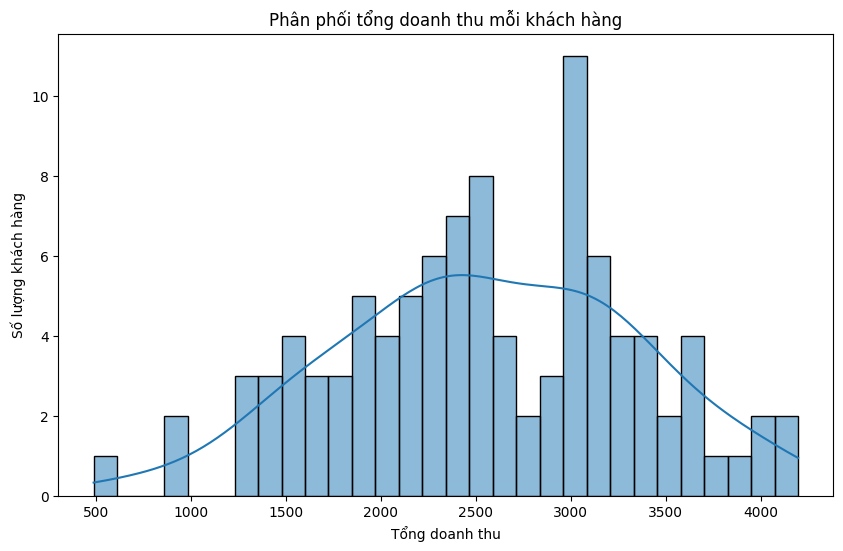

In [ ]:
# Vẽ biểu đồ tổng doanh thu mỗi khách hàng
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue, bins=30, kde=True)
plt.title('Phân phối tổng doanh thu mỗi khách hàng')
plt.xlabel('Tổng doanh thu')
plt.ylabel('Số lượng khách hàng')
plt.show()

# 2. Chiến lược marketing hiệu quả

### 1. Đọc dữ liệu

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

In [ ]:
# Dữ liệu1
Nam = ["2018", "2019", "2020", "2021", "2022", "2023", "2024(Dự đoán)"]
Doanhthu = [8.06, 10.8, 11.8, 13.7, 16.4, 20.5, 25]
Tangtruong = [30, 25, 18, 16, 20, 25, 20]

#Dữ liệu2
data = {
    "Ten": ["Shopee", "TikTok Shop", "Lazada", "Tiki"],
    "Gtri": [71.4, 22.0, 5.9, 0.7],
    "Sluong": [62.38, 19.24, 5.16, 0.58477],
}
df = pd.DataFrame(data)


### 2. Tình hình phát triển của thương mại điện tử

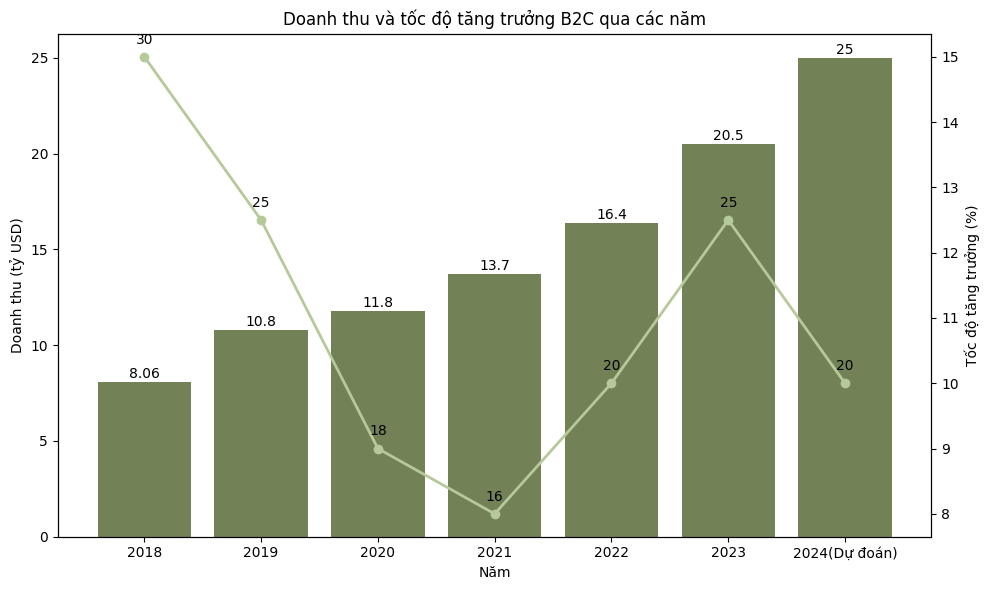

In [ ]:
# Tạo figure và axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# Vẽ biểu đồ cột
ax1.bar(Nam, Doanhthu, color="#728156", label="Doanh thu (tỷ USD)")
# Gắn nhãn vào các cột
for i, v in enumerate(Doanhthu):
    ax1.text(i, v + 0.2, str(v), ha='center', color='black')
# Tạo trục y thứ hai cho Tốc độ tăng trưởng
ax2 = ax1.twinx()
ax2.plot(Nam, np.array(Tangtruong) / 2, color="#B6C99B", marker='o', label="Tốc độ tăng trưởng (%)", linewidth=2)
ax2.set_ylabel("Tốc độ tăng trưởng (%)", color="black")
# Gắn nhãn vào các điểm của đường
for i, v in enumerate(Tangtruong):
    ax2.text(i, v / 2 + 0.2, str(v), ha='center', color='black')
# Đặt nhãn cho trục y chính
ax1.set_ylabel("Doanh thu (tỷ USD)")
# Tiêu đề và nhãn trục x
plt.title("Doanh thu và tốc độ tăng trưởng B2C qua các năm")
ax1.set_xlabel("Năm")
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 3. Thị phần giao dịch của các sàn TMĐT quý 2/2024

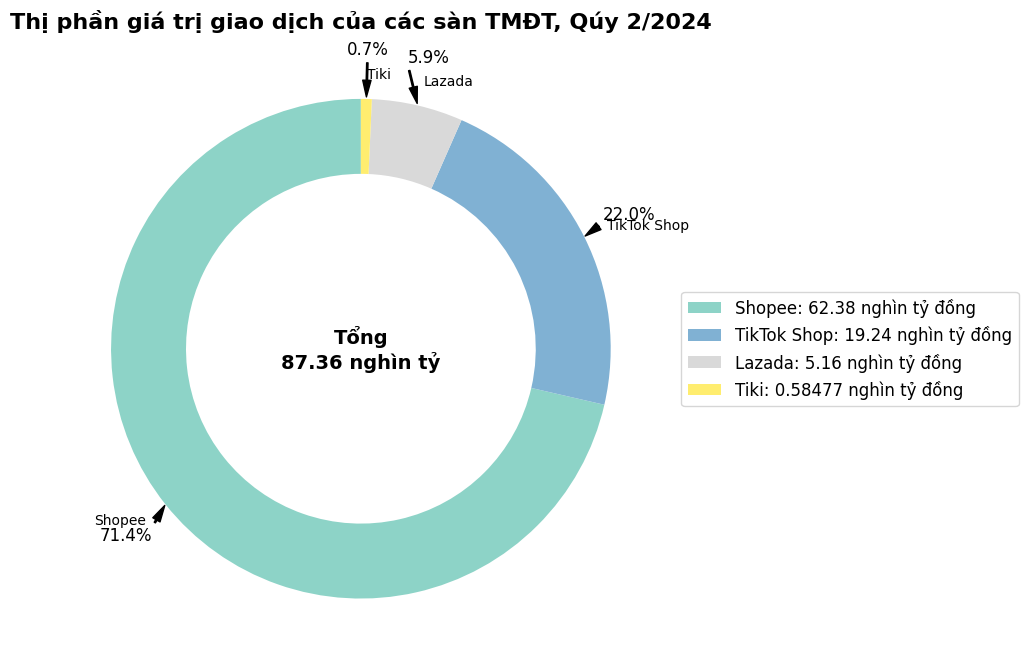

In [ ]:
# Tính phần trăm
df['phanso'] = df['Gtri'] / df['Gtri'].sum()
# Tổng giá trị
total_value = round(df['Sluong'].sum(), 2)
# Vẽ biểu đồ donut
fig, ax = plt.subplots(figsize=(10, 10))
# Tạo biểu đồ tròn
wedges, texts, autotexts = ax.pie(df['Gtri'], labels=df['Ten'], autopct='', startangle=90,
                                  colors=cm.Set3(np.linspace(0, 1, len(df))), wedgeprops=dict(width=0.3))
ax.legend([f"{name}: {value} nghìn tỷ đồng" for name, value in zip(df['Ten'], df['Sluong'])], loc="center left",
          bbox_to_anchor=(1, 0.5), fontsize=12)
plt.subplots_adjust(right=0.8)
# Thêm nhãn tổng giá trị vào giữa donut
ax.text(0, 0, f"Tổng\n{total_value} nghìn tỷ", ha='center', va='center', fontsize=14, fontweight='bold', color='black')
# Thêm đường nối giữa phần trăm và các phần trong biểu đồ
for i, wedge in enumerate(wedges):
    # Lấy vị trí của wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.radians(angle))
    y = np.sin(np.radians(angle))
    # Vẽ đường nối từ phần trăm tới wedge
    ax.annotate(f'{df["phanso"][i]*100:.1f}%', xy=(x, y), xytext=(1.2*x, 1.2*y),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),
                ha='center', va='center', fontsize=12, color='black')
# Cài đặt các tham số cho biểu đồ
ax.set_title("Thị phần giá trị giao dịch của các sàn TMĐT, Qúy 2/2024", fontsize=16, fontweight='bold', ha='center')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# 4. Tối ưu hóa quy trình vận hành chuỗi cung ứng

### 1. Đọc dữ liệu

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
data = pd.read_csv('supply_chain_data (1).csv')
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


### 2. Thống kê mô tả

In [ ]:
print(data.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

### 3. Phân tích chuỗi cung ứng bằng cách xem xét mối quan hệ giữa giá sản phẩm và doanh thu tạo ra từ sản phẩm

In [ ]:
fig = px.scatter(data, x = 'Price', y = 'Revenue generated',
                 title='Mối quan hệ giữa giá sản phẩm và doanh thu',
                 color = 'Product type', hover_data= 'Number of products sold',
                 trendline='ols')
fig.show()

#### 1. Doanh số theo từng loại sản phẩm

In [ ]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
pie_chart = px.pie(sales_data, values = 'Number of products sold', names = 'Product type',
                   title = 'Doanh thu số theo từng loại sản phẩm',
                   hover_data=['Number of products sold'], hole = 0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition = 'inside', textinfo = 'percent+label')
pie_chart.show()

### Doanh thu tạo ra bởi SKU


In [ ]:
revenue_chart = px.line(data, x='SKU',
                        y='Revenue generated',
                        title='Doanh thu được tạo ra bởi SKU')
revenue_chart.show()

### Tỉ lệ lỗi trung bình theo từng loại sản phẩm.

In [ ]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()
fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Tỉ lệ lỗi trung bình theo loại sản phẩm')
fig.show()

	Sản phẩm chăm sóc tóc có tỉ lệ lỗi cao nhất. Do đó cần chú trọng và cẩn thận hơn trong quá trình vận chuyển vì trong lúc vận chuyển có thể bị tác động dẫn đến lỗi hàng.

#### Tổng doanh tu theo hãng vận chuyển

In [ ]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Tổng doanh thu theo hãng vận chuyển',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Revenue Generated')
fig.show()

#### Chi phí vận chuyển theo nhà vận chuyển

In [ ]:
shipping_cost_chart = px.bar(data,x = 'Shipping carriers',
                             y = 'Shipping costs',
                             title = 'Chi phí theo nhà vận chuyển')
shipping_cost_chart.show()

##### Loại sản phẩm

In [ ]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time',
                       'Manufacturing costs': 'Average Manufacturing Costs'},
               inplace=True)
print(result)

### Chi phí và thời gian giao hàng

#### Chi phí theo phương thức vận chuyển

In [ ]:
transportation_chart = px.pie(data,
                              values='Costs',
                              names='Transportation modes',
                              title='Chi phí theo phương thức vận chuyển',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

#### Thời gian giao hàng theo nhà vận chuyển

In [ ]:
shipping_time = data.groupby('Transportation modes')['Shipping times'].mean().reset_index()
shipping_time_chart = px.pie(shipping_time, values = 'Shipping times', names = 'Transportation modes',
                             title = 'Thời gian giao hàng theo nhà vận chuyển',
                             hover_data='Shipping times', hole = 0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
shipping_time_chart.update_traces(textposition = 'inside', textinfo = 'percent+label')
shipping_time_chart.show()

# 5. Quản Lý Tồn Kho Và Giao Hàng

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn.metrics import mean_squared_error


In [ ]:
#Bước 1:Chuẩn Bị Dữ Liệu
#Đọc Dữ Liệu Từ File CSV
data = pd.read_csv('customer_data.csv')

#Bước 2:Tiền Xử Lý Dữ Liệu
#Kiểm Tra Dữ Liệu Thống Kê
print(data.describe())

#Kiểm Tra Dữ Liệu Rỗng
print(data.isnull().sum())

#Xử Lý Dữ Liệu Rỗng
data = data.dropna()
#Bước 3:Xây Dựng Mô Hình
from sklearn.linear_model import LinearRegression

# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện mô hình
X = data[['annual_income', 'spending_score']]
y = data['purchase_amount']
model.fit(X, y)

# Đánh giá mô hình
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)


       customer_id         age  annual_income  spending_score  purchase_amount
count  1000.000000  1000.00000    1000.000000     1000.000000      1000.000000
mean    500.500000    43.81900   51203.985000       50.139000       150.438000
std     288.819436    14.99103   14898.526105       28.296897        50.400996
min       1.000000    18.00000    6179.000000        1.000000       -16.000000
25%     250.750000    31.00000   40975.750000       25.750000       115.000000
50%     500.500000    44.00000   51135.500000       51.000000       151.000000
75%     750.250000    56.00000   61131.000000       75.000000       186.000000
max    1000.000000    69.00000   97896.000000       99.000000       284.000000
customer_id        0
age                0
gender             0
annual_income      0
spending_score     0
purchase_amount    0
dtype: int64
Mean Squared Error: 2533.081209353266


###1.Dự Đoán Nhu Cầu

<ipython-input-2-282a8af286a4>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase = data.groupby('age_group')['purchase_amount'].mean().reset_index()
<ipython-input-2-282a8af286a4>:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_predicted_purchase = data.groupby('age_group')['predicted_purchase'].mean().reset_index()
<ipython-input-2-282a8af286a4>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='purchase_amount', data=age_pu

=== Báo cáo: Tối ưu hóa Quản lý Tồn kho ===

Tổng số khách hàng: 999
Số tiền mua hàng trung bình: $150.60
Thu nhập trung bình: $51188.27

Phân tích theo độ tuổi:
  age_group  purchase_amount
0     10-20       154.177778
1     20-30       154.118644
2     30-40       148.948276
3     40-50       149.668224
4     50-60       151.556122
5     60-70       148.113990

Phân tích theo giới tính:
  gender_label  purchase_amount
0       Female       149.945263
1         Male       151.202290

Đánh giá mô hình dự đoán:
MSE (Mean Squared Error): 2616.79
R² Score: -0.01

Dự đoán số tiền mua hàng trung bình theo độ tuổi:
  age_group  predicted_purchase
0     10-20          151.840126
1     20-30          151.598013
2     30-40          150.433976
3     40-50          149.481570
4     50-60          148.518213
5     60-70          147.431071

Khách hàng đặc biệt (điểm chi tiêu thấp nhưng mua số lượng lớn):
     customer_id  spending_score  purchase_amount
736          737              15            

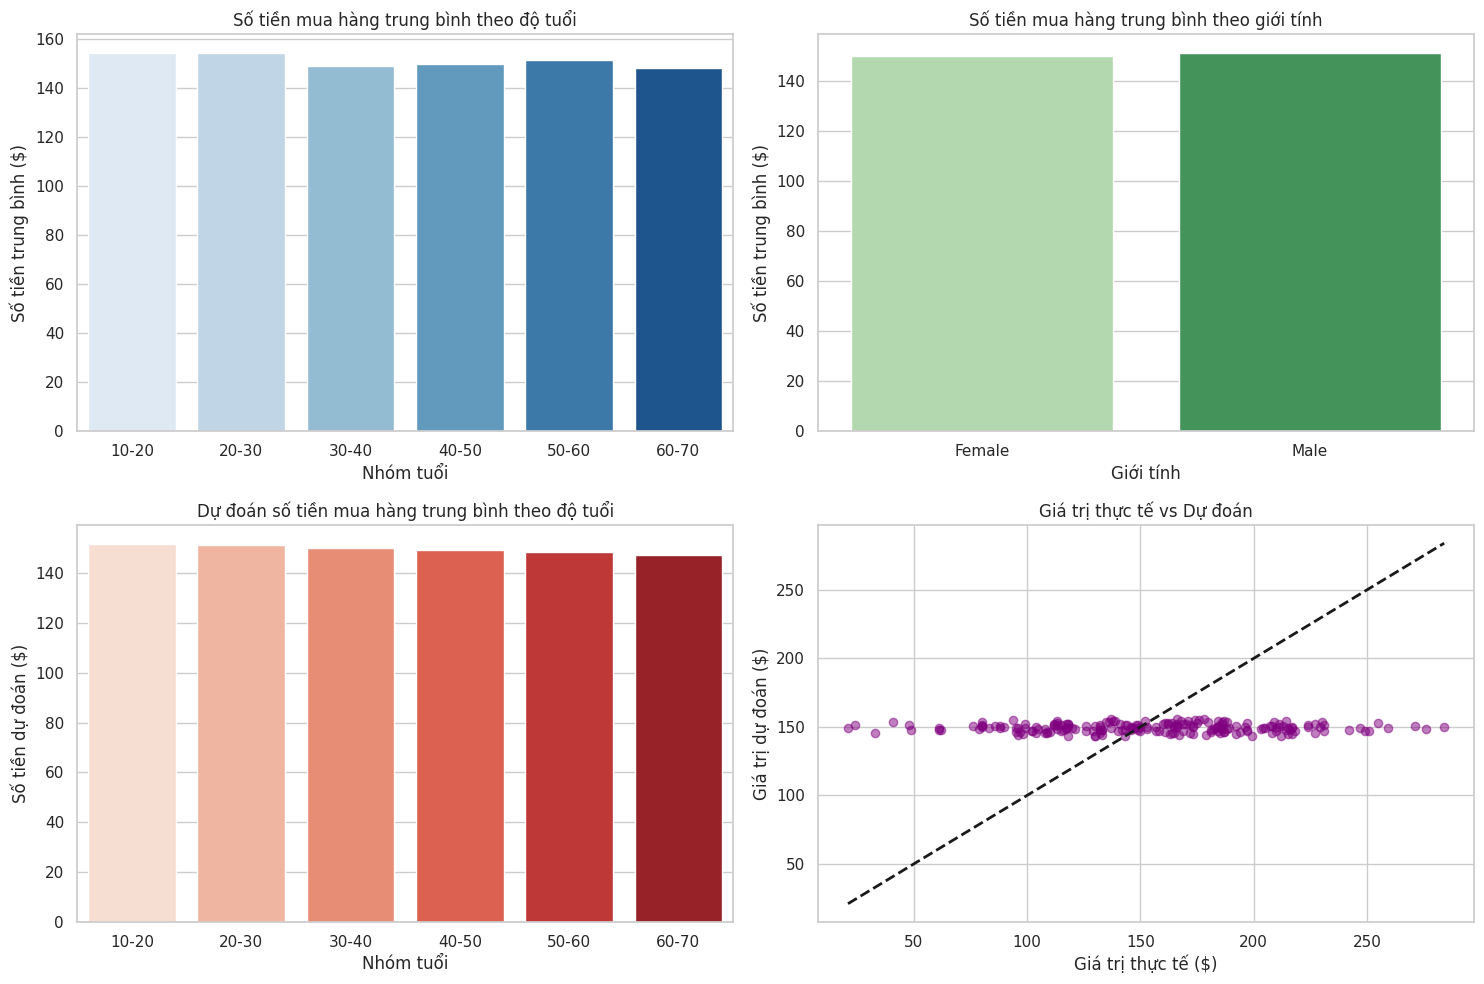

In [ ]:
# 1. Đọc dữ liệu từ file CSV
data = pd.read_csv("customer_data.csv")

# 2. Làm sạch dữ liệu: Loại bỏ giao dịch có số tiền mua hàng âm
data = data[data['purchase_amount'] >= 0]

# Chuyển đổi giới tính thành số (Male: 0, Female: 1)
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

# 3. Phân tích cơ bản
total_customers = len(data)
avg_purchase_amount = data['purchase_amount'].mean()
avg_income = data['annual_income'].mean()

# Phân khúc theo độ tuổi
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
age_purchase = data.groupby('age_group')['purchase_amount'].mean().reset_index()

# Phân khúc theo giới tính
data['gender_label'] = data['gender'].map({0: 'Male', 1: 'Female'})
gender_purchase = data.groupby('gender_label')['purchase_amount'].mean().reset_index()

# 4. Chuẩn bị dữ liệu cho mô hình dự đoán
X = data[['age', 'annual_income', 'spending_score', 'gender']]  # Đặc trưng
y = data['purchase_amount']  # Biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Xây dựng và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Dự đoán nhu cầu trung bình theo nhóm tuổi
data['predicted_purchase'] = model.predict(X)
age_predicted_purchase = data.groupby('age_group')['predicted_purchase'].mean().reset_index()

# 7. Xác định khách hàng đặc biệt (điểm chi tiêu thấp nhưng mua số lượng lớn)
low_spending_high_purchase = data[(data['spending_score'] < 20) & (data['purchase_amount'] > 250)]

# 8. Trực quan hóa kết quả
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Biểu đồ 1: Số tiền mua hàng trung bình theo độ tuổi
plt.subplot(2, 2, 1)
sns.barplot(x='age_group', y='purchase_amount', data=age_purchase, palette='Blues')
plt.title('Số tiền mua hàng trung bình theo độ tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số tiền trung bình ($)')

# Biểu đồ 2: Số tiền mua hàng trung bình theo giới tính
plt.subplot(2, 2, 2)
sns.barplot(x='gender_label', y='purchase_amount', data=gender_purchase, palette='Greens')
plt.title('Số tiền mua hàng trung bình theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số tiền trung bình ($)')

# Biểu đồ 3: Dự đoán số tiền mua hàng trung bình theo độ tuổi
plt.subplot(2, 2, 3)
sns.barplot(x='age_group', y='predicted_purchase', data=age_predicted_purchase, palette='Reds')
plt.title('Dự đoán số tiền mua hàng trung bình theo độ tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số tiền dự đoán ($)')

# Biểu đồ 4: So sánh giá trị thực tế và dự đoán
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Giá trị thực tế vs Dự đoán')
plt.xlabel('Giá trị thực tế ($)')
plt.ylabel('Giá trị dự đoán ($)')

plt.tight_layout()

# 9. In kết quả và khuyến nghị
print(" Báo cáo: Tối ưu hóa Quản lý Tồn kho ")
print(f"\nTổng số khách hàng: {total_customers}")
print(f"Số tiền mua hàng trung bình: ${avg_purchase_amount:.2f}")
print(f"Thu nhập trung bình: ${avg_income:.2f}")

print("\nPhân tích theo độ tuổi:")
print(age_purchase)

print("\nPhân tích theo giới tính:")
print(gender_purchase)

print("\nĐánh giá mô hình dự đoán:")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

print("\nDự đoán số tiền mua hàng trung bình theo độ tuổi:")
print(age_predicted_purchase)

print("\nKhách hàng đặc biệt (điểm chi tiêu thấp nhưng mua số lượng lớn):")
print(low_spending_high_purchase[['customer_id', 'spending_score', 'purchase_amount']])

print("\nKhuyến nghị quản lý tồn kho:")
print("- Tập trung dự trữ hàng hóa cho nhóm tuổi 20-30 và 60-70, vì đây là các nhóm có nhu cầu cao nhất.")
print("- Giảm dự trữ cho nhóm tuổi 30-40 và 40-50 để tránh lãng phí, do nhu cầu thấp hơn.")
print("- Dự trữ thêm sản phẩm giá trị cao cho khách hàng có điểm chi tiêu thấp nhưng mua số lượng lớn.")
print("- Sử dụng dự đoán nhu cầu để lập kế hoạch nhập hàng, đảm bảo đủ hàng hóa cho các nhóm ưu tiên.")

# Hiển thị biểu đồ
plt.show()

###2.Tối Ưu Hóa Kho Hàng

Khoảng cách di chuyển cho đơn hàng mẫu: 30.97 mét

Sử dụng không gian trên từng kệ:
   shelf_id  volume_used  volume_remaining  usage_percentage  \
0         1         6.93             23.07              23.1   
1         2        20.16              9.84              67.2   
2         3         1.50             28.50               5.0   

                                         products  
0  [Trứng gà, Xà phòng, Kem đánh răng, Nước ngọt]  
1                [Mì gói, Gạo, Bột giặt, Dầu gội]  
2                              [Sữa hộp, Bánh mì]  


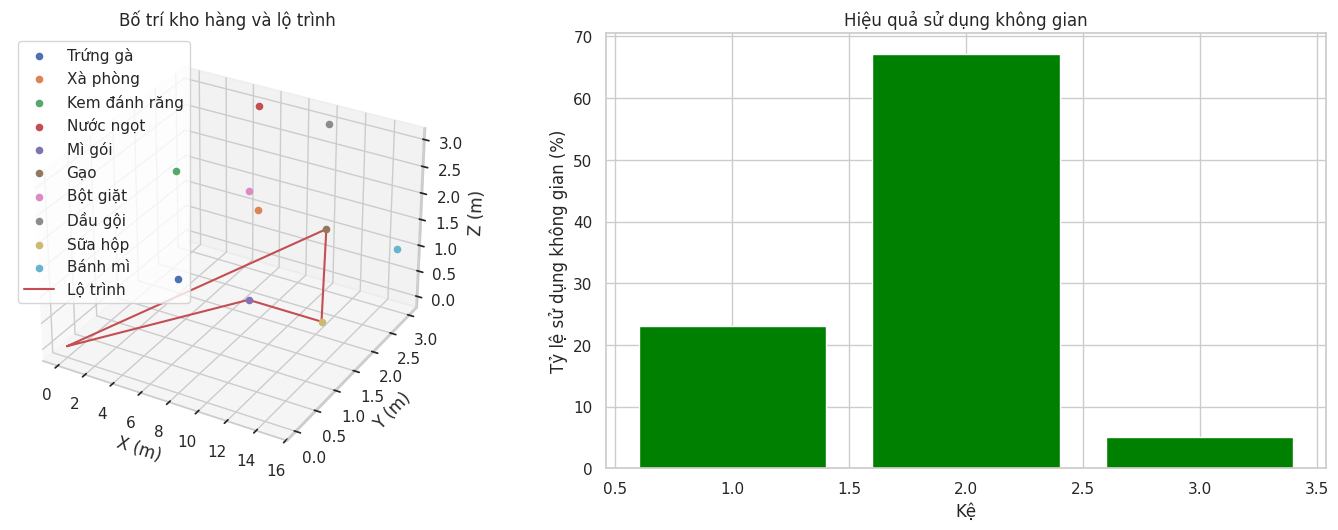

In [ ]:
# Đọc dữ liệu từ customer_data.csv
customers = pd.read_csv('customer_data.csv')

# Tạo danh sách sản phẩm với thông tin kích thước và giá
products = pd.DataFrame({
    'product_id': range(1, 11),
    'product_name': ['Bánh mì', 'Sữa hộp', 'Trứng gà', 'Gạo', 'Nước ngọt', 'Kem đánh răng', 'Dầu gội', 'Bột giặt', 'Xà phòng', 'Mì gói'],
    'width': [0.2, 0.1, 0.3, 0.5, 0.2, 0.1, 0.2, 0.3, 0.1, 0.2],  # Chiều rộng (m)
    'height': [0.1, 0.2, 0.1, 0.3, 0.3, 0.2, 0.3, 0.4, 0.1, 0.1],  # Chiều cao (m)
    'depth': [0.3, 0.2, 0.2, 0.4, 0.2, 0.1, 0.2, 0.3, 0.1, 0.2],   # Chiều sâu (m)
    'stock': [50, 100, 80, 30, 120, 60, 40, 20, 70, 90]  # Số lượng tồn kho
})
products['volume'] = products['width'] * products['height'] * products['depth']

# Tạo lịch sử mua hàng dựa trên customer_data.csv
n_orders = len(customers)
orders = []
for i in range(n_orders):
    num_items = np.random.randint(1, 5)
    items = np.random.choice(products['product_id'], num_items, replace=False)
    orders.append({'order_id': i+1, 'customer_id': customers['customer_id'].iloc[i], 'items': items})

# Phân tích các cặp sản phẩm thường được mua cùng nhau
co_purchases = Counter()
for order in orders:
    items = order['items']
    if len(items) > 1:
        pairs = list(combinations(items, 2))
        co_purchases.update(pairs)

co_purchase_df = pd.DataFrame(co_purchases.items(), columns=['pair', 'count'])
co_purchase_df = co_purchase_df.sort_values('count', ascending=False)

# Tính tần suất mua hàng của từng sản phẩm
product_frequency = Counter()
for order in orders:
    product_frequency.update(order['items'])
freq_df = pd.DataFrame(product_frequency.items(), columns=['product_id', 'frequency'])
products = products.merge(freq_df, on='product_id')

# Mô phỏng kho hàng với cấu trúc thực tế
# Kho có 3 kệ, mỗi kệ có 2 tầng, mỗi tầng có 2 vị trí (tổng 12 vị trí)
# Kích thước kệ: chiều rộng 5m, chiều cao 3m, chiều sâu 2m
# Tọa độ kệ: Kệ 1 (x=5), Kệ 2 (x=10), Kệ 3 (x=15)
shelves = [
    {'shelf_id': 1, 'x': 5, 'positions': [{'pos_id': 1, 'y': 1, 'z': 1}, {'pos_id': 2, 'y': 3, 'z': 1}, {'pos_id': 3, 'y': 1, 'z': 3}, {'pos_id': 4, 'y': 3, 'z': 3}]},
    {'shelf_id': 2, 'x': 10, 'positions': [{'pos_id': 5, 'y': 1, 'z': 1}, {'pos_id': 6, 'y': 3, 'z': 1}, {'pos_id': 7, 'y': 1, 'z': 3}, {'pos_id': 8, 'y': 3, 'z': 3}]},
    {'shelf_id': 3, 'x': 15, 'positions': [{'pos_id': 9, 'y': 1, 'z': 1}, {'pos_id': 10, 'y': 3, 'z': 1}, {'pos_id': 11, 'y': 1, 'z': 3}, {'pos_id': 12, 'y': 3, 'z': 3}]}
]
shelf_capacity = {'width': 5, 'height': 3, 'depth': 2}
shelf_volume = shelf_capacity['width'] * shelf_capacity['height'] * shelf_capacity['depth']

# Tối ưu hóa bố trí kho hàng
# Ưu tiên đặt các sản phẩm có tần suất cao và thường mua cùng nhau
top_pair = co_purchase_df.iloc[0]['pair']
product_a, product_b = top_pair
product_positions = {product_a: 1, product_b: 2}

# Đặt các sản phẩm còn lại dựa trên tần suất
remaining_products = products[~products['product_id'].isin([product_a, product_b])]
remaining_products = remaining_products.sort_values('frequency', ascending=False)
remaining_positions = list(range(3, 13))
for i, product in enumerate(remaining_products['product_id']):
    product_positions[product] = remaining_positions[i % len(remaining_positions)]

# Tạo DataFrame vị trí sản phẩm
product_positions_df = pd.DataFrame(list(product_positions.items()), columns=['product_id', 'position'])
product_positions_df = product_positions_df.merge(products, on='product_id')

# Gán tọa độ cho từng sản phẩm
position_coords = []
for shelf in shelves:
    for pos in shelf['positions']:
        position_coords.append({'position': pos['pos_id'], 'x': shelf['x'], 'y': pos['y'], 'z': pos['z']})
position_coords_df = pd.DataFrame(position_coords)
product_positions_df = product_positions_df.merge(position_coords_df, on='position')

# Quản lý luồng hàng hóa
# Mô phỏng lộ trình lấy hàng cho một đơn hàng ngẫu nhiên
sample_order = orders[0]['items']
path = [(0, 0, 0)]  # Bắt đầu từ cửa kho (0, 0, 0)
total_distance = 0
for item in sample_order:
    pos = product_positions_df[product_positions_df['product_id'] == item][['x', 'y', 'z']].iloc[0]
    path.append((pos['x'], pos['y'], pos['z']))
    # Tính khoảng cách Euclid
    last_pos = path[-2]
    distance = np.sqrt((pos['x'] - last_pos[0])**2 + (pos['y'] - last_pos[1])**2 + (pos['z'] - last_pos[2])**2)
    total_distance += distance
path.append((0, 0, 0))  # Quay lại cửa kho
last_pos = path[-2]
distance = np.sqrt((0 - last_pos[0])**2 + (0 - last_pos[1])**2 + (0 - last_pos[2])**2)
total_distance += distance

print(f"Khoảng cách di chuyển cho đơn hàng mẫu: {total_distance:.2f} mét")

# Hiệu quả sử dụng không gian
# Tính toán không gian sử dụng trên từng kệ, xem xét xếp chồng
shelf_usage = []
for shelf in shelves:
    shelf_id = shelf['shelf_id']
    shelf_products = product_positions_df[product_positions_df['x'] == shelf['x']]
    total_volume = shelf_products['volume'].sum() * shelf_products['stock'].sum()
    volume_used = min(total_volume, shelf_volume)  # Không vượt quá dung lượng kệ
    volume_remaining = shelf_volume - volume_used
    usage_percentage = (volume_used / shelf_volume) * 100
    shelf_usage.append({
        'shelf_id': shelf_id,
        'volume_used': volume_used,
        'volume_remaining': volume_remaining,
        'usage_percentage': usage_percentage,
        'products': list(shelf_products['product_name'])
    })
shelf_usage_df = pd.DataFrame(shelf_usage)

print("\nSử dụng không gian trên từng kệ:")
print(shelf_usage_df)

# Trực quan hóa
fig = plt.figure(figsize=(15, 10))

# Biểu đồ 1: Bố trí kho hàng (3D)
ax = fig.add_subplot(221, projection='3d')
for _, row in product_positions_df.iterrows():
    ax.scatter(row['x'], row['y'], row['z'], label=row['product_name'])
ax.plot([p[0] for p in path], [p[1] for p in path], [p[2] for p in path], 'r-', label='Lộ trình')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Bố trí kho hàng và lộ trình')
ax.legend()

# Biểu đồ 2: Sử dụng không gian
plt.subplot(222)
plt.bar(shelf_usage_df['shelf_id'], shelf_usage_df['usage_percentage'], color='green')
plt.xlabel('Kệ')
plt.ylabel('Tỷ lệ sử dụng không gian (%)')
plt.title('Hiệu quả sử dụng không gian')

plt.tight_layout()
plt.show()

###3.Quản Lý giao hàng


Tuyến đường ngắn nhất từ Hoàn Kiếm đến Cầu Giấy: Hoàn Kiếm -> Hai Bà Trưng -> Cầu Giấy
Khoảng cách: 9.00 km
Hệ số giao thông trung bình: 0.85

Thời gian yêu cầu (Deadline): 40 phút

Thời gian giao hàng dự đoán:
- xe_may: 11.06 phút (Chi phí: $1.80)
- o_to: 7.23 phút (Chi phí: $4.50)
- xe_tai: 16.20 phút (Chi phí: $6.30)

Các phương tiện giao hàng kịp thời:
- xe_may: 11.06 phút
- o_to: 7.23 phút
- xe_tai: 16.20 phút

Phương tiện được chọn: o_to (7.23 phút)


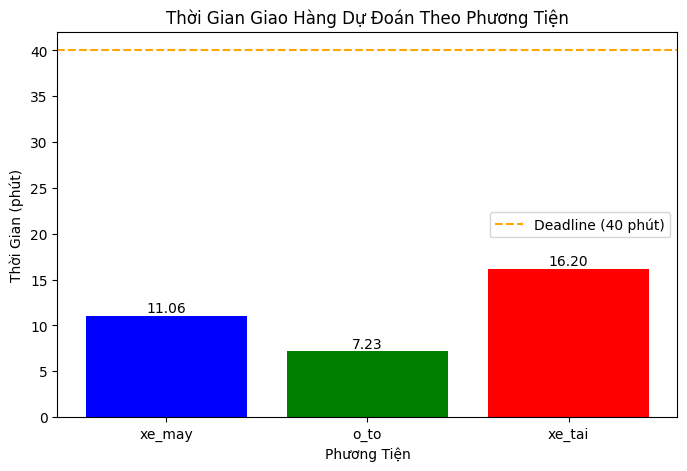

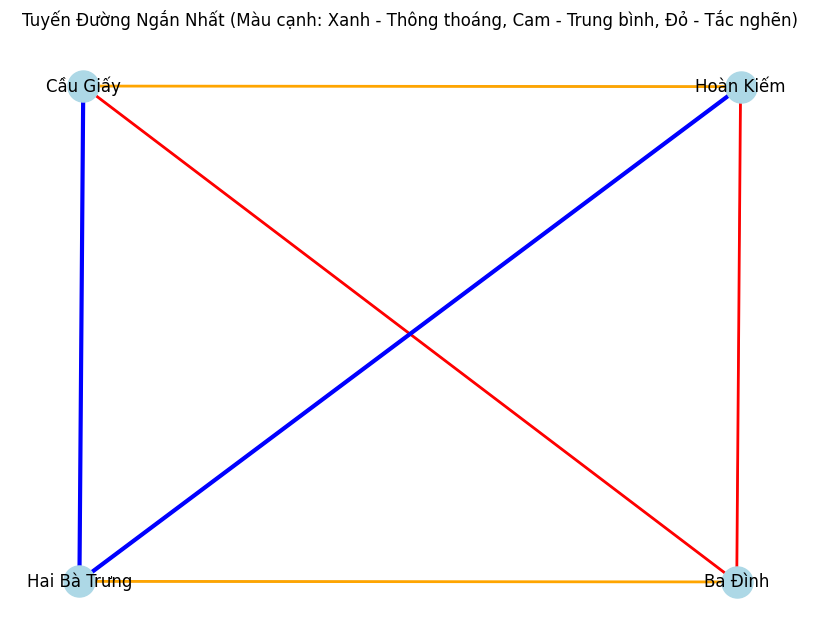

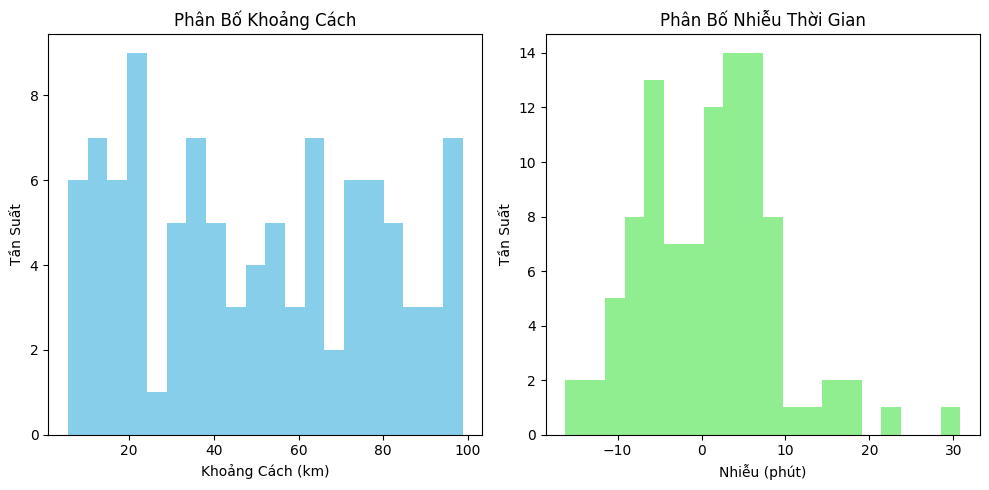

In [ ]:
# Dữ liệu phương tiện giao hàng (tốc độ trung bình km/h, chi phí/km)
VEHICLES = {
    "xe_may": {"speed": 40, "cost": 0.2},
    "o_to":   {"speed": 60, "cost": 0.5},
    "xe_tai": {"speed": 30, "cost": 0.7}  # Giảm tốc độ xuống 30 km/h
}

def generate_data(num_samples=100, seed=42):
    np.random.seed(seed)
    distances = np.random.uniform(5, 100, num_samples)
    traffic_factors = np.random.uniform(0.8, 1.5, num_samples)
    # Thêm độ lệch nhiễu cao hơn cho xe tải
    noise = np.random.normal(0, 8, num_samples)  # Độ lệch tăng từ 5 lên 8
    return pd.DataFrame({
        'distance': distances,
        'traffic_factor': traffic_factors,
        'noise': noise
    })

def predict_delivery_time(model: LinearRegression,
                          distance: float,
                          traffic_factor: float,
                          vehicle: str) -> float:
    base_time = (distance / VEHICLES[vehicle]["speed"]) * 60
    # Hệ số điều chỉnh giao thông đặc thù cho xe tải
    traffic_adjustment = 1.3 if vehicle == "xe_tai" else 1.0  # Tăng từ 1.1 lên 1.3
    adjusted_time = base_time * traffic_factor * traffic_adjustment
    # Thêm hệ số nhân nhiễu riêng cho xe tải
    df = pd.DataFrame([{'distance': distance, 'traffic_factor': traffic_factor}])
    noise = model.predict(df)[0]
    if vehicle == "xe_tai":
        noise *= 2.0  # Tăng hệ số nhiễu từ 1.5 lên 2.0
    total_time = adjusted_time + noise
    # Đảm bảo thời gian không âm và phản ánh thực tế
    return max(10.0, total_time)  # Giới hạn tối thiểu 10 phút

# Dự đoán thời gian giao hàng
def predict_delivery_time(model: LinearRegression,
                          distance: float,
                          traffic_factor: float,
                          vehicle: str) -> float:
    base_time = (distance / VEHICLES[vehicle]["speed"]) * 60
    # Thêm hệ số điều chỉnh giao thông cho xe tải
    traffic_adjustment = 1.1 if vehicle == "xe_tai" else 1.0
    adjusted_time = base_time * traffic_factor * traffic_adjustment
    # Điều chỉnh nhiễu theo phương tiện
    df = pd.DataFrame([{'distance': distance, 'traffic_factor': traffic_factor}])
    noise = model.predict(df)[0]
    if vehicle == "xe_tai":
        noise *= 1.5  # Tăng nhiễu cho xe tải
    total_time = adjusted_time + noise
    return max(1.0, total_time)

# Tạo đồ thị tuyến đường thực tế (Hà Nội)
def create_realistic_graph(traffic_conditions):
    G = nx.Graph()
    locations = [
        ("Hoàn Kiếm", "Ba Đình", 3.5),
        ("Hoàn Kiếm", "Hai Bà Trưng", 2.8),
        ("Ba Đình", "Cầu Giấy", 5.0),
        ("Hai Bà Trưng", "Cầu Giấy", 6.2),
        ("Hoàn Kiếm", "Cầu Giấy", 7.0),
        ("Ba Đình", "Hai Bà Trưng", 4.5)
    ]

    for loc1, loc2, distance in locations:
        traffic_factor = traffic_conditions.get((loc1, loc2), 1.0)
        effective_weight = distance * traffic_factor
        G.add_edge(loc1, loc2, distance=distance, traffic_factor=traffic_factor, effective_weight=effective_weight)

    return G

# Tìm tuyến đường ngắn nhất
def find_shortest_path(graph, start, end):
    return nx.shortest_path(graph, start, end, weight='effective_weight')

# Kiểm tra giao hàng kịp thời
def check_timely_delivery(predicted_time, deadline):
    return predicted_time <= deadline

# Chọn phương tiện nhanh nhất và kiểm tra kịp thời
def find_fastest_delivery_method(model, distance, traffic_factor, deadline):
    delivery_times = {}
    timely_vehicles = []
    for vehicle, specs in VEHICLES.items():
        time = predict_delivery_time(model, distance, traffic_factor, vehicle)
        cost = distance * specs["cost"]
        delivery_times[vehicle] = {"time": time, "cost": cost}
        if check_timely_delivery(time, deadline):
            timely_vehicles.append((vehicle, time))

    fastest_vehicle = min(delivery_times, key=lambda x: delivery_times[x]["time"])
    best_vehicle = min(timely_vehicles, key=lambda x: x[1])[0] if timely_vehicles else fastest_vehicle
    return best_vehicle, delivery_times, timely_vehicles

# Vẽ biểu đồ cột thời gian giao hàng
def plot_delivery_times(delivery_times, deadline):
    vehicles = list(delivery_times.keys())
    times = [delivery_times[v]["time"] for v in vehicles]
    plt.figure(figsize=(8, 5))
    bars = plt.bar(vehicles, times, color=['blue', 'green', 'red'])
    plt.axhline(y=deadline, color='orange', linestyle='--', label=f'Deadline ({deadline} phút)')
    plt.title("Thời Gian Giao Hàng Dự Đoán Theo Phương Tiện")
    plt.xlabel("Phương Tiện")
    plt.ylabel("Thời Gian (phút)")
    plt.legend()
    for bar, time in zip(bars, times):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{time:.2f}', ha='center', va='bottom')
    plt.savefig('delivery_times.png')

# Vẽ đồ thị tuyến đường
def plot_route_graph(graph, path):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12)
    edge_colors = []
    for u, v in graph.edges():
        traffic = graph[u][v]['traffic_factor']
        if traffic > 1.2:
            edge_colors.append('red')
        elif traffic > 0.8:
            edge_colors.append('orange')
        else:
            edge_colors.append('green')
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, width=2)
    nx.draw_networkx_edges(graph, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], edge_color='blue', width=3)
    plt.title("Tuyến Đường Ngắn Nhất (Màu cạnh: Xanh - Thông thoáng, Cam - Trung bình, Đỏ - Tắc nghẽn)")
    plt.savefig('route_graph.png')

# Vẽ biểu đồ phân bố dữ liệu
def plot_data_distribution(data):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data['distance'], bins=20, color='skyblue')
    plt.title("Phân Bố Khoảng Cách")
    plt.xlabel("Khoảng Cách (km)")
    plt.ylabel("Tần Suất")

    plt.subplot(1, 2, 2)
    plt.hist(data['noise'], bins=20, color='lightgreen')
    plt.title("Phân Bố Nhiễu Thời Gian")
    plt.xlabel("Nhiễu (phút)")
    plt.ylabel("Tần Suất")
    plt.tight_layout()
    plt.savefig('data_distribution.png')

# Hàm chính
def main():
    # Tạo dữ liệu và huấn luyện mô hình nhiễu
    data = generate_data()
    model = train_model(data)

    # Thử nghiệm
    start_point, end_point = "Hoàn Kiếm", "Cầu Giấy"
    deadline = 40  # Thời gian yêu cầu (phút)

    # Mô phỏng điều kiện giao thông (Hà Nội)
    traffic_conditions = {
        ("Hoàn Kiếm", "Ba Đình"): 1.3,
        ("Hoàn Kiếm", "Hai Bà Trưng"): 0.7,
        ("Ba Đình", "Cầu Giấy"): 1.5,
        ("Hai Bà Trưng", "Cầu Giấy"): 1.0,
        ("Hoàn Kiếm", "Cầu Giấy"): 1.2,
        ("Ba Đình", "Hai Bà Trưng"): 0.9
    }

    # Tạo đồ thị với giao thông
    G = create_realistic_graph(traffic_conditions)

    # Tìm tuyến đường ngắn nhất
    path = find_shortest_path(G, start_point, end_point)
    total_distance = sum(G[path[i]][path[i+1]]['distance'] for i in range(len(path)-1))
    avg_traffic_factor = np.mean([G[path[i]][path[i+1]]['traffic_factor'] for i in range(len(path)-1)])

    # Tìm phương tiện nhanh nhất và kiểm tra kịp thời
    best_vehicle, delivery_times, timely_vehicles = find_fastest_delivery_method(model, total_distance, avg_traffic_factor, deadline)

    # In kết quả
    print(f"Tuyến đường ngắn nhất từ {start_point} đến {end_point}: {' -> '.join(path)}")
    print(f"Khoảng cách: {total_distance:.2f} km")
    print(f"Hệ số giao thông trung bình: {avg_traffic_factor:.2f}")
    print(f"\nThời gian yêu cầu (Deadline): {deadline} phút")
    print("\nThời gian giao hàng dự đoán:")
    for vehicle, info in delivery_times.items():
        print(f"- {vehicle}: {info['time']:.2f} phút (Chi phí: ${info['cost']:.2f})")

    if timely_vehicles:
        print("\nCác phương tiện giao hàng kịp thời:")
        for vehicle, time in timely_vehicles:
            print(f"- {vehicle}: {time:.2f} phút")
        print(f"\nPhương tiện được chọn: {best_vehicle} ({delivery_times[best_vehicle]['time']:.2f} phút)")
    else:
        print("\nCảnh báo: Không có phương tiện nào giao hàng kịp thời!")
        print(f"Phương tiện nhanh nhất: {best_vehicle} ({delivery_times[best_vehicle]['time']:.2f} phút)")

    # Vẽ biểu đồ
    plot_delivery_times(delivery_times, deadline)
    plot_route_graph(G, path)
    plot_data_distribution(data)

if __name__ == "__main__":
    main()